In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, ARDRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPRegressor
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [2]:
# Загрузим все наши преобразованные данные
Data_natural = pd.read_csv('Data_natural.csv')
Data_scaled_test_1 = pd.read_csv('data_cs12_scaled_test.csv')
Data_scaled_train_1 = pd.read_csv('data_cs12_scaled_train.csv')
Data_scaled_test_2 = pd.read_csv('data_cs22_scaled_test.csv')
Data_scaled_train_2 = pd.read_csv('data_cs22_scaled_train.csv')
Data_scaled_test_y=pd.read_csv('data_cs22_scaled_test_y.csv')
Data_scaled_train_y=pd.read_csv('data_cs22_scaled_train_y.csv')

In [3]:
# ВО всех датафреймах загрузился столбец лишний с номером. Удалим его сразу
Data_natural = Data_natural.drop('Unnamed: 0', axis=1)
Data_scaled_test_1= Data_scaled_test_1.drop('Unnamed: 0', axis=1)
Data_scaled_train_1= Data_scaled_train_1.drop('Unnamed: 0', axis=1)
Data_scaled_train_2= Data_scaled_train_2.drop('Unnamed: 0', axis=1)
Data_scaled_test_2= Data_scaled_test_2.drop('Unnamed: 0', axis=1)
Data_scaled_test_y= Data_scaled_test_y.drop('Unnamed: 0', axis=1)
Data_scaled_train_y= Data_scaled_train_y.drop('Unnamed: 0', axis=1)

In [4]:
# Выделим зависимую переменную
Y= Data_natural['Прибыль в расчете на 1 работника']
# DataFrame не содержащий целевой признак
X_ALL = Data_natural.drop('Прибыль в расчете на 1 работника', axis=1)

In [5]:
# Разбиваем датасет на train/test исходные данные без стандартизации
X_train, X_test, y_train, y_test = train_test_split(X_ALL, Y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

## Построение моделей

In [18]:
# Cоздадим списки для хранения моделей
MAE_y=[]
R2_y=[]
MAPE_y=[]

## Ridge regression

In [7]:
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

StandardScaler

In [11]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(Data_scaled_train_1,Data_scaled_train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [12]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.01, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-588806.6766290737


In [16]:
# модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(Data_scaled_train_1,Data_scaled_train_y)
print (modelRidge.predict(Data_scaled_test_1).shape)
y_pred = modelRidge.predict(Data_scaled_test_1)
MAE_Ridge_1 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Ridge_1 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Ridge_1=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Ridge_1)
print (R2_Ridge_1)
print (MAPE_Ridge_1)

(3003, 1)
423749.2511956893
0.6626253340532142
7.602662617458295


In [19]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Ridge',MAE_Ridge_1])
R2_y.append(['Ridge',R2_Ridge_1])
MAPE_y.append(['Ridge',MAPE_Ridge_1])

MeanNormalisation

In [21]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(Data_scaled_train_2,Data_scaled_train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [22]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.1, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-588806.4292541135


In [24]:
# модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(Data_scaled_train_2,Data_scaled_train_y)
print (modelRidge.predict(Data_scaled_test_2).shape)
y_pred = modelRidge.predict(Data_scaled_test_2)
MAE_Ridge_2 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Ridge_2 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Ridge_2=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Ridge_2)
print (R2_Ridge_2)
print (MAPE_Ridge_2)

(3003, 1)
423762.81270740024
0.6626150744689492
7.599450997227071


In [25]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Ridge2',MAE_Ridge_2])
R2_y.append(['Ridge2',R2_Ridge_2])
MAPE_y.append(['Ridge2',MAPE_Ridge_2])

In [28]:
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for lambda_val in lambda_values:
    modelRidge = Ridge(lambda_val)
    modelRidge.fit(Data_scaled_train_1,Data_scaled_train_y)
    y_pred =  modelRidge.predict(Data_scaled_test_1)
    MAERidge_1 = mean_absolute_error(Data_scaled_test_y,y_pred)
    R2Ridge_1 = r2_score(Data_scaled_test_y,y_pred)
    MAPE_Ridge_1=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
    print(("Lambda={} ошибка MAE={}").format(lambda_val, MAERidge_1))
    print(("Lambda={} ошибка R2={}").format(lambda_val, R2Ridge_1))
    print(("Lambda={} ошибка R2={}").format(lambda_val, MAPE_Ridge_1))
    print("_____")

Lambda=1e-05 ошибка MAE=423755.2161511899
Lambda=1e-05 ошибка R2=0.6626235498234028
Lambda=1e-05 ошибка R2=7.603404463996474
_____
Lambda=0.0001 ошибка MAE=423755.2167128109
Lambda=0.0001 ошибка R2=0.6626235500023125
Lambda=0.0001 ошибка R2=7.6034044000282766
_____
Lambda=0.001 ошибка MAE=423755.22232901934
Lambda=0.001 ошибка R2=0.6626235517914043
Lambda=0.001 ошибка R2=7.603403760346456
_____
Lambda=0.01 ошибка MAE=423755.2784909046
Lambda=0.01 ошибка R2=0.6626235696818179
Lambda=0.01 ошибка R2=7.6033973635423635
_____
Lambda=0.1 ошибка MAE=423755.84008974984
Lambda=0.1 ошибка R2=0.6626237485355859
Lambda=0.1 ошибка R2=7.603333396912786
_____
Lambda=0.2 ошибка MAE=423756.46404580836
Lambda=0.2 ошибка R2=0.6626239471545992
Lambda=0.2 ошибка R2=7.603262325889377
_____
Lambda=0.3 ошибка MAE=423757.0879569688
Lambda=0.3 ошибка R2=0.6626241456605835
Lambda=0.3 ошибка R2=7.603191258033483
_____
Lambda=0.4 ошибка MAE=423757.7118232372
Lambda=0.4 ошибка R2=0.6626243440535589
Lambda=0.4 ошибк

## Lasso regression

StandardScaler

In [31]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(Data_scaled_train_1,Data_scaled_train_y)
y_pred = modelLasso.predict(Data_scaled_test_1)
MAE_Lasso_1 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Lasso_1 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Lasso_1=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Lasso_1)
print (R2_Lasso_1)
print (MAPE_Lasso_1)

423755.2162766188
0.6626235497297432
7.603404419940278


In [32]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Lasso',MAE_Lasso_1])
R2_y.append(['Lasso',R2_Lasso_1])
MAPE_y.append(['Lasso',MAPE_Lasso_1])

MeanNormalisation

In [33]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(Data_scaled_train_2,Data_scaled_train_y)
y_pred = modelLasso.predict(Data_scaled_test_2)
MAE_Lasso_2 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Lasso_2 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Lasso_2=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Lasso_2)
print (R2_Lasso_2)
print (MAPE_Lasso_2)

423755.2168100557
0.6626235496510025
7.603404295946575


In [34]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Lasso2',MAE_Lasso_2])
R2_y.append(['Lasso2',R2_Lasso_2])
MAPE_y.append(['Lasso2',MAPE_Lasso_2])

## ElasticNet regression

StandardScaler

In [35]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(Data_scaled_train_1,Data_scaled_train_y)
y_pred = modelElastic.predict(Data_scaled_test_1)
MAE_Elastic_1 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Elastic_1 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Elastic_1=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Elastic_1)
print (R2_Elastic_1)
print (MAPE_Elastic_1)

446066.9252404609
0.6489260933940177
6.657383614325499


In [36]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Elastic1',MAE_Elastic_1])
R2_y.append(['Elastic1',R2_Elastic_1])
MAPE_y.append(['Elastic1',MAPE_Elastic_1])

MeanNormalisation

In [37]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(Data_scaled_train_2,Data_scaled_train_y)
y_pred = modelElastic.predict(Data_scaled_test_2)
MAE_Elastic_2 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_Elastic_2 = r2_score(Data_scaled_test_y,y_pred)
MAPE_Elastic_2=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_Elastic_2)
print (R2_Elastic_2)
print (MAPE_Elastic_2)

616376.1605312865
0.3906174184208623
9.304927492387593


In [38]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['Elastic2',MAE_Elastic_2])
R2_y.append(['Elastic2',R2_Elastic_2])
MAPE_y.append(['Elastic2',MAPE_Elastic_2])

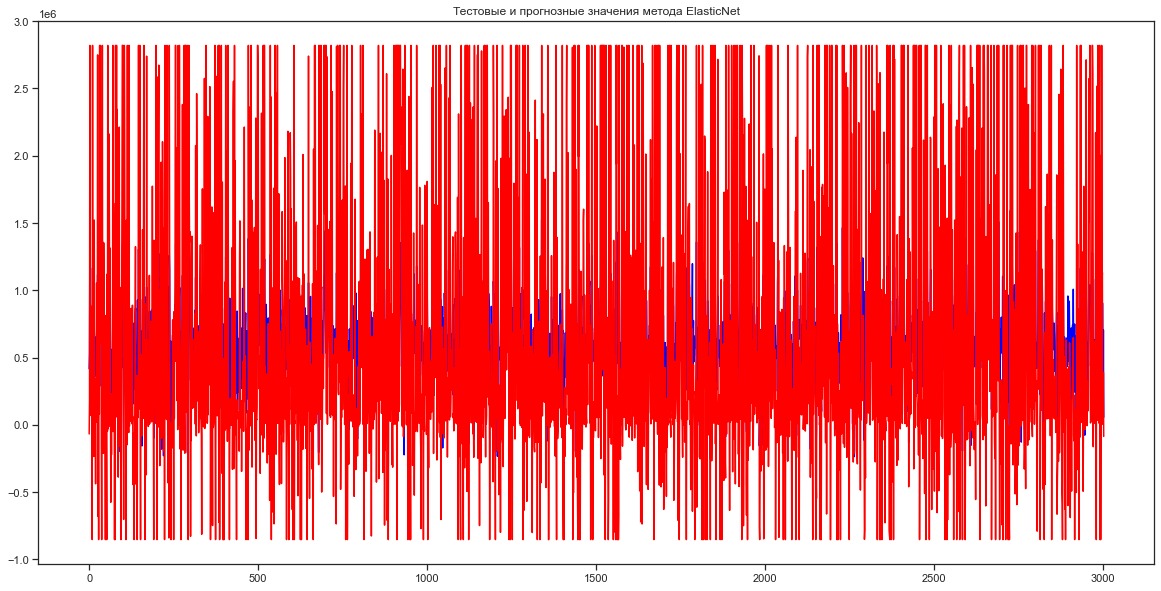

In [40]:
# Визуализируем полученные результаты работы модели K-Neighbors Regressor:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения метода ElasticNet")
plt.plot(y_pred, label = "Прогноз", color = 'blue')
plt.plot(Data_scaled_test_y.values, label = "Тест", color = 'red')

## Линейная регрессия

StandardScaler

In [48]:
modelLR = LinearRegression()
modelLR.fit(Data_scaled_train_1,Data_scaled_train_y)
y_pred = modelLR.predict(Data_scaled_test_1)
MAE_LR_1 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_LR_1 = r2_score(Data_scaled_test_y,y_pred)
MAPE_LR_1=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_LR_1)
print (R2_LR_1)
print (MAPE_LR_1)


423755.2160887873
0.662623549803524
7.603404471104058


In [49]:
#Параметры уравнения регрессии
modelLR.coef_

array([[  -7474.18984001,  400265.60322803, -187601.47622878,
         170961.53252074,  -32737.01564408,   51789.49215456,
          -2660.35542477,  127796.91985881,   -8158.95957339,
        -108786.38969175,   61240.4960021 , -511009.65641609]])

In [54]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['LinearRegr',MAE_LR_1])
R2_y.append(['LinearRegr',R2_LR_1])
MAPE_y.append(['LinearRegr',MAPE_LR_1])

MeanNormalisation

In [50]:
modelLR = LinearRegression()
modelLR.fit(Data_scaled_train_2,Data_scaled_train_y)
y_pred = modelLR.predict(Data_scaled_test_2)
MAE_LR_2 = mean_absolute_error(Data_scaled_test_y,y_pred)
R2_LR_2 = r2_score(Data_scaled_test_y,y_pred)
MAPE_LR_2=mean_absolute_percentage_error(Data_scaled_test_y,y_pred)
print (MAE_LR_2)
print (R2_LR_2)
print (MAPE_LR_2)


423755.21608878736
0.6626235498035239
7.6034044711040485


In [51]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['LinearRegr2',MAE_LR_2])
R2_y.append(['LinearRegr2',R2_LR_2])
MAPE_y.append(['LinearRegr2',MAPE_LR_2])

## Оценка результатов

In [55]:
#  результаты MAE
a = np.array(MAE_y)
b = np.array(R2_y)
c = np.array(MAPE_y)
Mod_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'MAE': a[:,1], 
                             'R2': b[:,1], 'MAPE': c[:,1]})
Mod_errors

,Модель регрессии,MAE,R2,MAPE
0,Ridge,423749.2511956893,0.6626253340532142,7.602662617458295
1,Ridge2,423762.81270740024,0.6626150744689492,7.599450997227071
2,Lasso,423755.2162766188,0.6626235497297432,7.603404419940278
3,Lasso2,423755.2168100557,0.6626235496510025,7.603404295946575
4,Elastic1,446066.9252404609,0.6489260933940177,6.657383614325499
5,Elastic2,616376.1605312865,0.3906174184208623,9.304927492387593
6,LinearRegr2,423755.21608878736,0.6626235498035239,7.6034044711040485
7,LinearRegr,423755.2160887873,0.662623549803524,7.603404471104058


In [56]:
Mod_errors['MAE']=pd.to_numeric(Mod_errors['MAE'], downcast="integer")
Mod_errors['R2']=pd.to_numeric(Mod_errors['R2'], downcast="integer")
Mod_errors['MAPE']=pd.to_numeric(Mod_errors['MAPE'], downcast="integer")

In [57]:
Mod_errors

,Модель регрессии,MAE,R2,MAPE
0,Ridge,423749.251196,0.662625,7.602663
1,Ridge2,423762.812707,0.662615,7.599451
2,Lasso,423755.216277,0.662624,7.603404
3,Lasso2,423755.216810,0.662624,7.603404
4,Elastic1,446066.925240,0.648926,6.657384
5,Elastic2,616376.160531,0.390617,9.304927
6,LinearRegr2,423755.216089,0.662624,7.603404
7,LinearRegr,423755.216089,0.662624,7.603404


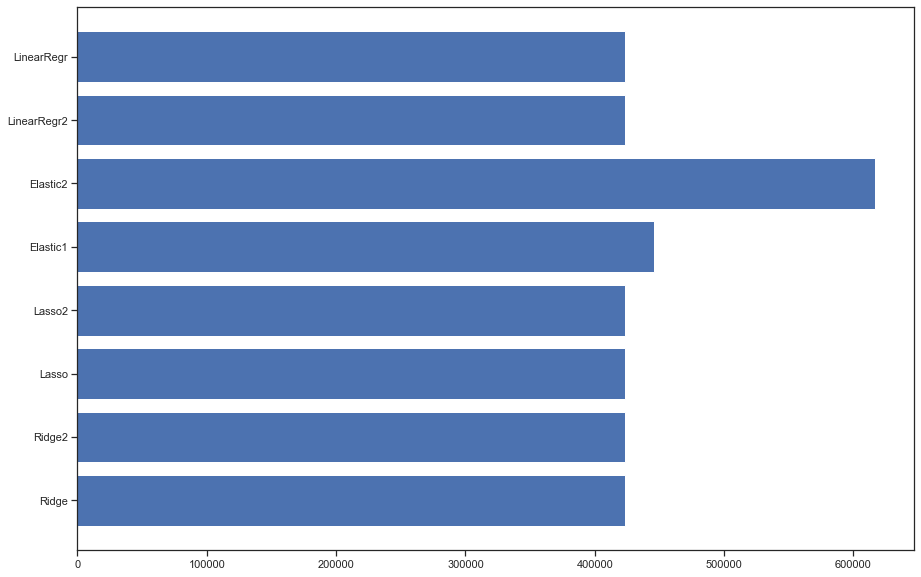

In [58]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['MAE'])
plt.show()

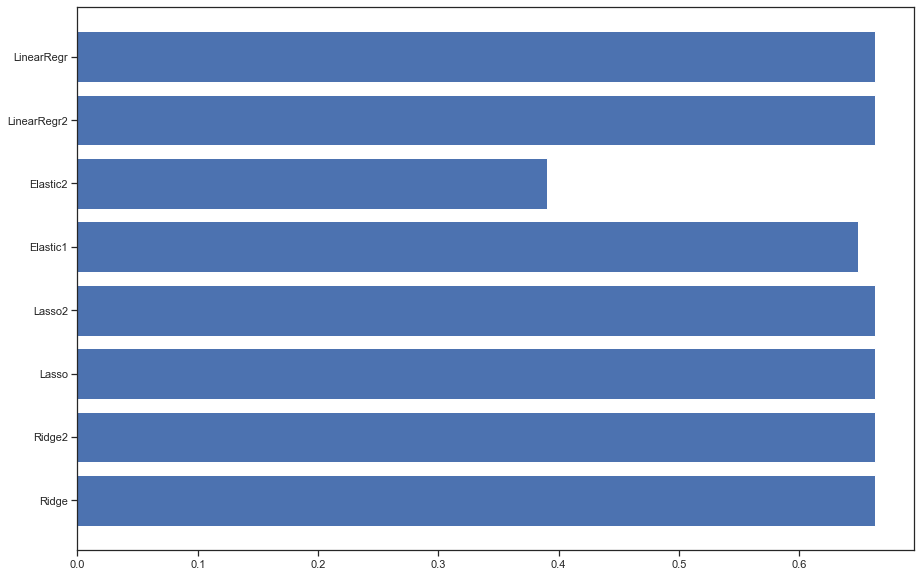

In [59]:
#Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['R2'])
plt.show()

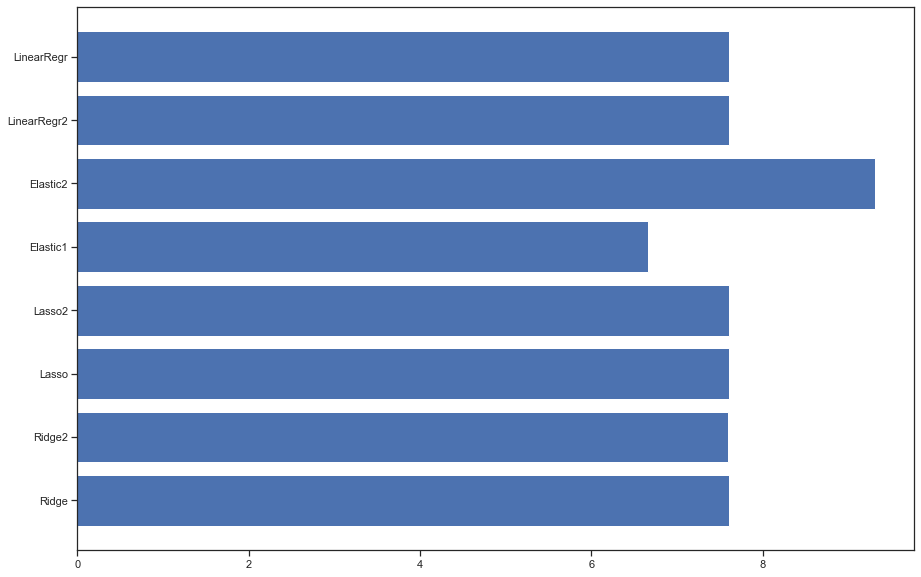

In [60]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['MAPE'])
plt.show()